In [18]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 예제 데이터 (심리 설문 데이터)
data = pd.read_csv("../preprocessed/preprocessed_coursera.csv")

# object 타입 변수 목록 출력
removed_columns = data.select_dtypes(include=['object']).columns.tolist()
print("제거된 열:", removed_columns)

# object 타입 변수 제거
data_cleaned = data.select_dtypes(exclude=['object'])

data_cleaned

제거된 열: ['course_name', 'posted_date', 'crawling_date', 'Review_Text', 'Crawled_date']


,Rating,avg_rating,num_of_ratings,helpfulness,num_of_reviews,num_of_enrolled,num_of_top_instructor_courses,num_of_top_instructor_leaners,text_length,time_lapsed,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth
0,5,4.8,27905,54,5510,988223,325,11153139,40,490,0.2,11.00,85.02,0.615755,0.699835
1,5,4.8,27905,44,5510,988223,325,11153139,36,559,0.2,8.11,84.98,0.522035,0.719817
2,5,4.8,27905,41,5510,988223,325,11153139,38,565,0.2,9.71,69.11,0.385761,0.481265
3,5,4.8,27905,32,5510,988223,325,11153139,38,326,0.2,10.76,69.11,0.412913,0.503966
4,5,4.8,27905,24,5510,988223,325,11153139,30,561,0.2,14.00,56.25,0.675941,0.561266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121382,5,4.6,66,0,9,9693,2,83454,68,452,0.4,13.27,45.76,0.749141,0.444210
121383,5,4.6,66,0,9,9693,2,83454,27,564,0.4,8.36,83.15,0.646984,0.742023
121384,5,4.6,66,0,9,9693,2,83454,5,564,0.4,10.00,49.48,0.351222,1.115342
121385,5,4.6,66,0,9,9693,2,83454,4,454,0.4,11.60,50.50,0.746378,0.314778


KMO Test: 0.6324793067383477, Bartlett’s Test p-value: 0.0

요인 부하량 (Factor Loadings):
                                      0         1
Rating                         0.396022 -0.873749
avg_rating                     0.425959 -0.150450
num_of_ratings                 0.958555  0.221123
helpfulness                   -0.040483  0.140459
num_of_reviews                 0.804997  0.088649
num_of_enrolled                0.955259  0.223853
num_of_top_instructor_courses -0.005169 -0.012447
num_of_top_instructor_leaners  0.304365 -0.030561
text_length                    0.091254  0.224572
time_lapsed                    0.167827  0.020128
Deviation of star ratings     -0.428649  0.900702
FOG Index                      0.015081  0.038978
Flesch Reading Ease            0.014452  0.014430
depth                          0.051873  0.180738
breadth                       -0.014233 -0.210742

공통성 (Communalities):
                               Communality
Rating                            0.920272
avg_ra

/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


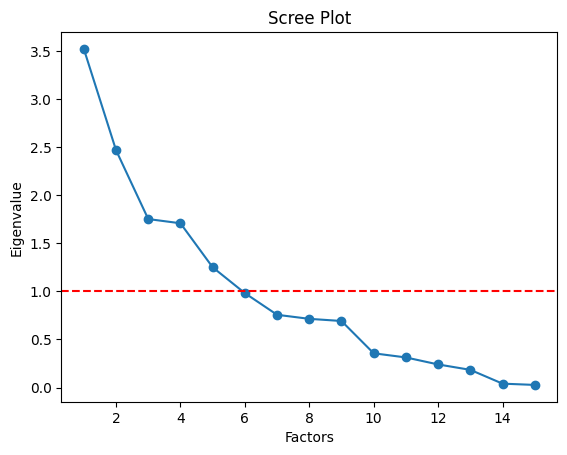

In [19]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMO 및 Bartlett 검정
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"KMO Test: {kmo_model}, Bartlett’s Test p-value: {p_value}")

# 요인 분석 실행 (요인 개수 = 2개)
fa = FactorAnalyzer(n_factors=2, method='ml', rotation='varimax')
fa.fit(data_scaled)

# 요인 부하량(Factor Loadings) 출력
loadings = pd.DataFrame(fa.loadings_, index=data_cleaned.columns)
print("\n요인 부하량 (Factor Loadings):")
print(loadings)  

# 공통성(Communalities) 출력
communalities = pd.DataFrame(fa.get_communalities(), index=data_cleaned.columns, columns=["Communality"])
print("\n공통성 (Communalities):")
print(communalities) 

# 스크리 플롯 (참고용, 실제 요인 개수는 2개로 고정)
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # 기준선 추가
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()
